In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal


from models.regression import BayesianRegressor
from models.baselines import BaselineLinearRegressor
from models.baselines import BaselineLinRegressorWithDropout
from models.baselines import BaselineEnsembleMethodRegression


from utils.vis import weights_histogram


In [2]:
# Regression Target
def experiment(x, eps):
    return x + 0.3 * torch.sin(2 * torch.pi * (x + eps)) + 0.3 * torch.sin(4 * torch.pi * (x + eps)) + eps
    # return -x**4 + 3*x**2 + 1


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


### Creating Training Data

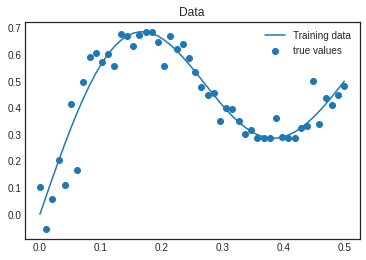

In [4]:
# toy dataset we can start with
train_samples = 50
x_train = torch.linspace(0, 0.5, train_samples).reshape(-1, 1)
eps = Normal(0, 0.02).sample(x_train.size())
y_train = experiment(x_train, eps)
y_train_true = experiment(x_train, 0)

plt.plot(x_train.numpy(), y_train_true.detach().numpy(), label='Training data')
plt.scatter(x_train, y_train, label='true values')
plt.title('Data')
plt.legend()
plt.show()


### Defining bayesian model and training

In [5]:
bayes_model = BayesianRegressor(hidden_dim=128, ll_var=0.05, mixture_prior=False).to(device)
optimizer = optim.Adam(bayes_model.parameters(), lr=0.01)
elbo_samples = 6
epochs = 2000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    # forward + backward + optimize
    loss = bayes_model.energy_loss(x_train, y_train, elbo_samples)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')


epoch: 1/2000
Loss: 3174.23876953125
epoch: 101/2000
Loss: 2765.362060546875
epoch: 201/2000
Loss: 2389.288818359375
epoch: 301/2000
Loss: 2068.485107421875
epoch: 401/2000
Loss: 1768.507568359375
epoch: 501/2000
Loss: 1533.262451171875
epoch: 601/2000
Loss: 1405.890869140625
epoch: 701/2000
Loss: 1282.4827880859375
epoch: 801/2000
Loss: 1227.683837890625
epoch: 901/2000
Loss: 1196.5458984375
epoch: 1001/2000
Loss: 1134.8631591796875
epoch: 1101/2000
Loss: 1116.805908203125
epoch: 1201/2000
Loss: 1102.1641845703125
epoch: 1301/2000
Loss: 1062.3321533203125
epoch: 1401/2000
Loss: 1084.5985107421875
epoch: 1501/2000
Loss: 1018.3197021484375
epoch: 1601/2000
Loss: 1002.752685546875
epoch: 1701/2000
Loss: 974.4697265625
epoch: 1801/2000
Loss: 968.1331787109375
epoch: 1901/2000
Loss: 953.2994384765625
Finished Training


### Baseline linear regression model and training

In [6]:
bl_linres_model = BaselineLinearRegressor(hidden_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(bl_linres_model.parameters(), lr=0.01)
epochs = 2000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    y_train_preds = bl_linres_model(x_train)
    # forward + backward + optimize
    loss = criterion(y_train_preds, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')


epoch: 1/2000
Loss: 0.22936290502548218
epoch: 101/2000
Loss: 0.009989122860133648
epoch: 201/2000
Loss: 0.008147657848894596
epoch: 301/2000
Loss: 0.007072622422128916
epoch: 401/2000
Loss: 0.005528701934963465
epoch: 501/2000
Loss: 0.004217362031340599
epoch: 601/2000
Loss: 0.00368592725135386
epoch: 701/2000
Loss: 0.003533409209921956
epoch: 801/2000
Loss: 0.003491311566904187
epoch: 901/2000
Loss: 0.0034795799292623997
epoch: 1001/2000
Loss: 0.00347389979287982
epoch: 1101/2000
Loss: 0.0034701188560575247
epoch: 1201/2000
Loss: 0.003472183598205447
epoch: 1301/2000
Loss: 0.0034616568591445684
epoch: 1401/2000
Loss: 0.0034618850331753492
epoch: 1501/2000
Loss: 0.0034577816259115934
epoch: 1601/2000
Loss: 0.003457958111539483
epoch: 1701/2000
Loss: 0.0035321416798979044
epoch: 1801/2000
Loss: 0.003481638617813587
epoch: 1901/2000
Loss: 0.003957442007958889
Finished Training


### Baseline Linear Regression Model with Dropout Model and Training

In [7]:
bl_lrdrop_model = BaselineLinRegressorWithDropout(hidden_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(bl_lrdrop_model.parameters(), lr=0.01)
epochs = 5000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    y_train_preds = bl_lrdrop_model(x_train)
    # forward + backward + optimize
    loss = criterion(y_train_preds, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')


epoch: 1/5000
Loss: 0.3849114775657654
epoch: 101/5000
Loss: 0.014667722396552563
epoch: 201/5000
Loss: 0.016143476590514183
epoch: 301/5000
Loss: 0.011184624396264553
epoch: 401/5000
Loss: 0.01524727325886488
epoch: 501/5000
Loss: 0.009526070207357407
epoch: 601/5000
Loss: 0.013454475440084934
epoch: 701/5000
Loss: 0.013820244930684566
epoch: 801/5000
Loss: 0.008563030511140823
epoch: 901/5000
Loss: 0.012870388105511665
epoch: 1001/5000
Loss: 0.00959376897662878
epoch: 1101/5000
Loss: 0.013068301603198051
epoch: 1201/5000
Loss: 0.011225037276744843
epoch: 1301/5000
Loss: 0.011856790632009506
epoch: 1401/5000
Loss: 0.013595987111330032
epoch: 1501/5000
Loss: 0.01177663542330265
epoch: 1601/5000
Loss: 0.01029717456549406
epoch: 1701/5000
Loss: 0.020070724189281464
epoch: 1801/5000
Loss: 0.01492149569094181
epoch: 1901/5000
Loss: 0.01062140055000782
epoch: 2001/5000
Loss: 0.01273546926677227
epoch: 2101/5000
Loss: 0.011869513429701328
epoch: 2201/5000
Loss: 0.009701705537736416
epoch: 23

### Baseline Ensemble Regression Model and Training

In [8]:
bl_ensemble_reg = BaselineEnsembleMethodRegression(device, num_models=2)

for model_idx, curr_regressor_model in enumerate(bl_ensemble_reg.models):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(curr_regressor_model.parameters(), lr=0.01)
    epochs = 2000

    x_train = x_train.to(device)
    y_train = y_train.to(device)

    print('Now training model #{}:'.format(model_idx))
    for epoch in range(epochs):  # loop over the dataset multiple times
        optimizer.zero_grad()
        y_train_preds = curr_regressor_model(x_train)
        # forward + backward + optimize
        loss = criterion(y_train_preds, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print('epoch: {}/{}'.format(epoch + 1, epochs))
            print('Loss:', loss.item())
    print('Model #{} Done Training'.format(model_idx))


Now training model #0:
epoch: 1/2000
Loss: 0.5769651532173157
epoch: 1001/2000
Loss: 0.0034448045771569014
Model #0 Done Training
Now training model #1:
epoch: 1/2000
Loss: 0.39308157563209534
epoch: 1001/2000
Loss: 0.003464670618996024
Model #1 Done Training


# Results and Comparisons

In [9]:
def plot_model_reults(model, plot_title, test_samples: int = 100, exp_samples: int = 100, x_range=[-0.3, 0.8], pred_label: str = 'Model Prediction'):
    x_test = torch.linspace(
        x_range[0], x_range[1], test_samples).reshape(-1, 1)
    y_samp = np.zeros((exp_samples, test_samples))
    x_test = x_test.to(device)
    for s in range(exp_samples):
        y_hat = model.forward(x_test).cpu().detach().numpy()
        y_samp[s, :] = y_hat.reshape(-1)
    plt.plot(x_test.cpu().detach().numpy(), np.mean(
        y_samp, axis=0), label=pred_label)
    plt.plot(x_test.cpu().detach().numpy(), experiment(
        x_test, 0.0).cpu().detach().numpy(), 'g', label='Ground Truth')
    plt.fill_between(x_test.cpu().detach().numpy().reshape(-1), np.percentile(y_samp, 2.5, axis=0),
                     np.percentile(y_samp, 97.5, axis=0),
                     alpha=0.25, label='95% Confidence')
    plt.legend()
    plt.scatter(x_train.cpu().detach().numpy(), y_train.cpu().detach().numpy())
    plt.title(plot_title)
    plt.show()


### Bayes Model Prediction

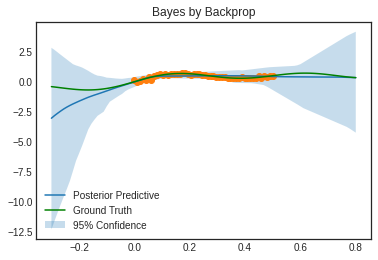

In [10]:
plot_model_reults(bayes_model, 'Bayes by Backprop', pred_label='Posterior Predictive')


### Baseline Linear Regression Model Prediction

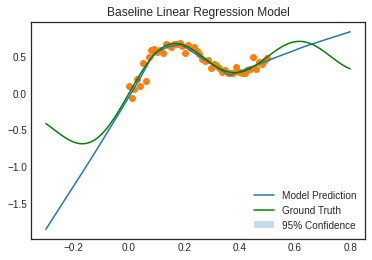

In [11]:
plot_model_reults(bl_linres_model, 'Baseline Linear Regression Model')


### Baseline Linear Regression Model with Dropout Prediction without turning off dropout during training time!

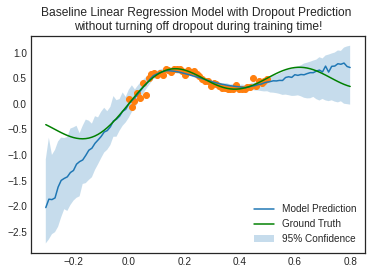

In [12]:
plot_model_reults(
    bl_lrdrop_model, "Baseline Linear Regression Model with Dropout Prediction \nwithout turning off dropout during training time!")


### Baseline Linear Regression Model with Dropout Prediction

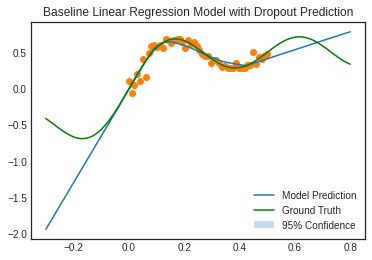

In [13]:
plot_model_reults(bl_lrdrop_model.eval(),
                  "Baseline Linear Regression Model with Dropout Prediction")


### Baseline Ensemble Regression Model Prediction

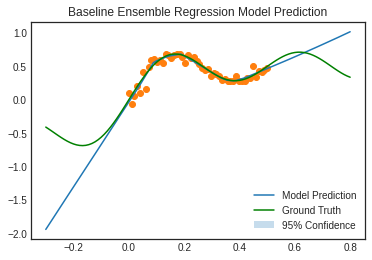

In [14]:
plot_model_reults(bl_ensemble_reg.eval(),
                  "Baseline Ensemble Regression Model Prediction")
